In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

In [5]:
df = pd.read_csv('transactions.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [9]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [13]:
df.isnull().sum().sum()

0

In [15]:
df['isFraud'].value_counts()

isFraud
0    1047433
1       1142
Name: count, dtype: int64

In [16]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    1048575
Name: count, dtype: int64

In [17]:
df.shape[0]

1048575

In [18]:
round(df['isFraud'].value_counts()[1] / df.shape[0] * 100,2)

0.11

Text(0, 0.5, 'Count')

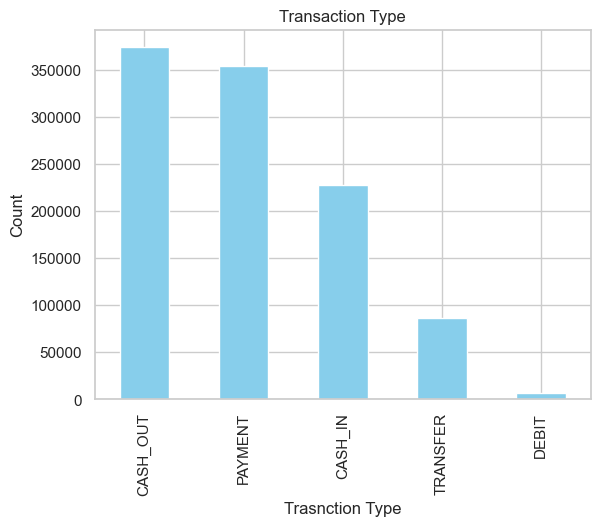

In [20]:
df['type'].value_counts().plot(kind = 'bar', title = 'Transaction Type', color = 'skyblue')
plt.xlabel('Trasnction Type')
plt.ylabel('Count')

Text(0, 0.5, 'Fraud Rate')

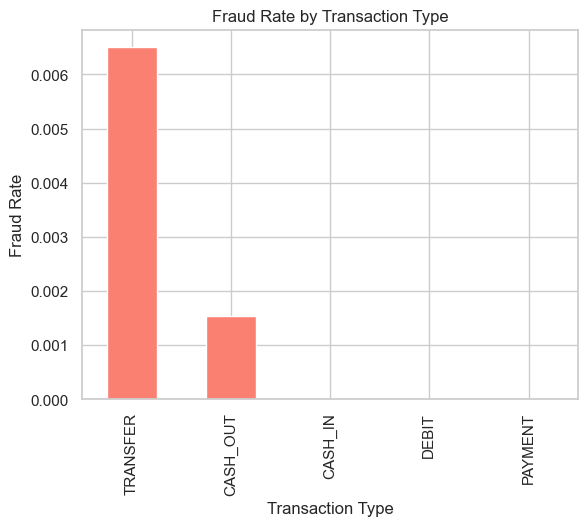

In [21]:
fraud_by_type = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
fraud_by_type.plot(kind='bar', title='Fraud Rate by Transaction Type', color='salmon')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Rate')

In [24]:
df['amount'].describe().astype(int)

count     1048575
mean       158666
std        264940
min             0
25%         12149
50%         76343
75%        213761
max      10000000
Name: amount, dtype: int32

Text(0, 0.5, 'Frequency')

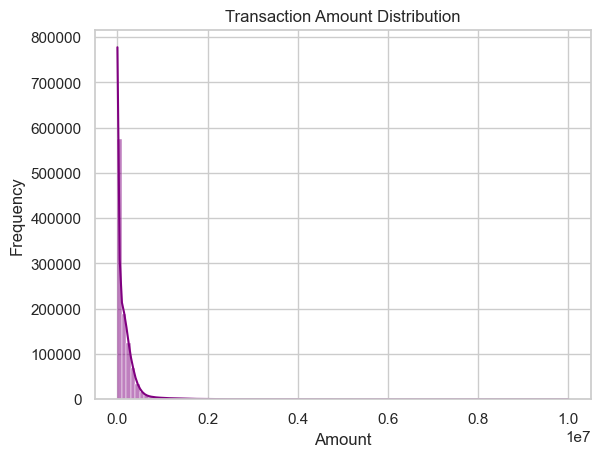

In [27]:
sns.histplot(df['amount'], bins=100, kde=True, color='purple')
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')

Text(0, 0.5, 'Amount')

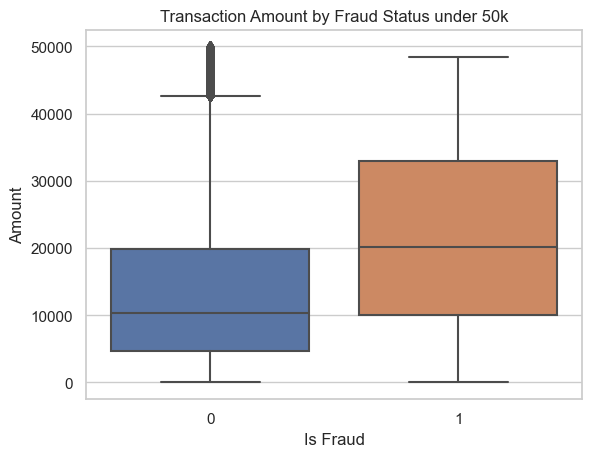

In [33]:
sns.boxplot(data= df[df['amount'] < 50000], x='isFraud', y='amount')
plt.title('Transaction Amount by Fraud Status under 50k')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')

In [34]:
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest']


In [37]:
(df['balanceDiffOrig'] < 0).sum()

221805

In [38]:
(df['balanceDiffDest'] < 0).sum()

203566

In [39]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [40]:
df.drop(columns='step', inplace=True)

In [45]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [48]:
top_senders = df['nameOrig'].value_counts().head(10)
top_senders

nameOrig
C1214450722    2
C309111136     2
C1268675361    2
C720460198     2
C1109092856    2
C545402485     2
C1362689728    2
C110179857     2
C1467095135    2
C2073023524    2
Name: count, dtype: int64

In [49]:
top_receivers = df['nameDest'].value_counts().head(10)
top_receivers

nameDest
C985934102     98
C1286084959    96
C1590550415    89
C248609774     88
C665576141     87
C2083562754    86
C977993101     82
C1360767589    81
C451111351     80
C306206744     79
Name: count, dtype: int64

In [50]:
fraud_users = df[df['isFraud'] == 1]['nameOrig'].value_counts().head(10)
fraud_users

nameOrig
C1305486145    1
C1776675634    1
C289101217     1
C1116093088    1
C1795901064    1
C1422133318    1
C1694539503    1
C1198248537    1
C1837436553    1
C1422380255    1
Name: count, dtype: int64

In [52]:
fraud_type = df[df['type'].isin(['TRANSFER','CASH_OUT'])]
fraud_type.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [54]:
fraud_type['type'].value_counts()

type
CASH_OUT    373641
TRANSFER     86753
Name: count, dtype: int64

Text(0.5, 1.0, 'Fraudulent Transactions by Type')

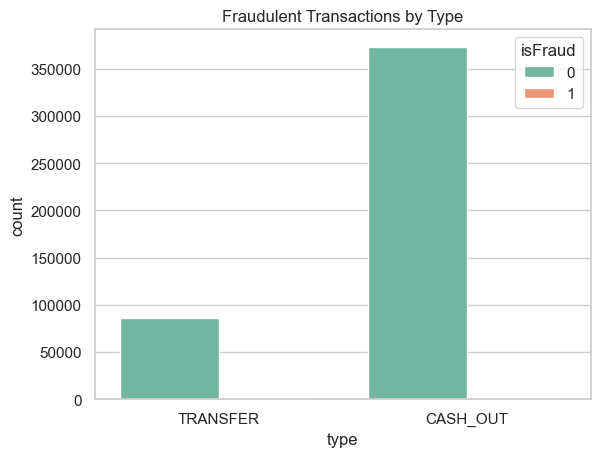

In [55]:
sns.countplot(data=fraud_type, x='type', hue='isFraud', palette='Set2')
plt.title('Fraudulent Transactions by Type')

In [57]:
corr = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'balanceDiffOrig', 'balanceDiffDest', 'isFraud']].corr()
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,balanceDiffOrig,balanceDiffDest,isFraud
amount,1.000000,0.004864,-0.001133,0.215558,0.311936,0.131801,0.513277,0.128862
oldbalanceOrg,0.004864,1.000000,0.999047,0.093305,0.064049,-0.248333,-0.118078,0.003829
newbalanceOrig,-0.001133,0.999047,1.000000,0.095182,0.063725,-0.290369,-0.128184,-0.009438
oldbalanceDest,0.215558,0.093305,0.095182,1.000000,0.978403,-0.066818,0.134147,-0.007552
newbalanceDest,0.311936,0.064049,0.063725,0.978403,1.000000,-0.010073,0.336089,-0.000495
balanceDiffOrig,0.131801,-0.248333,-0.290369,-0.066818,-0.010073,1.000000,0.256157,0.293467
balanceDiffDest,0.513277,-0.118078,-0.128184,0.134147,0.336089,0.256157,1.000000,0.032034
isFraud,0.128862,0.003829,-0.009438,-0.007552,-0.000495,0.293467,0.032034,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

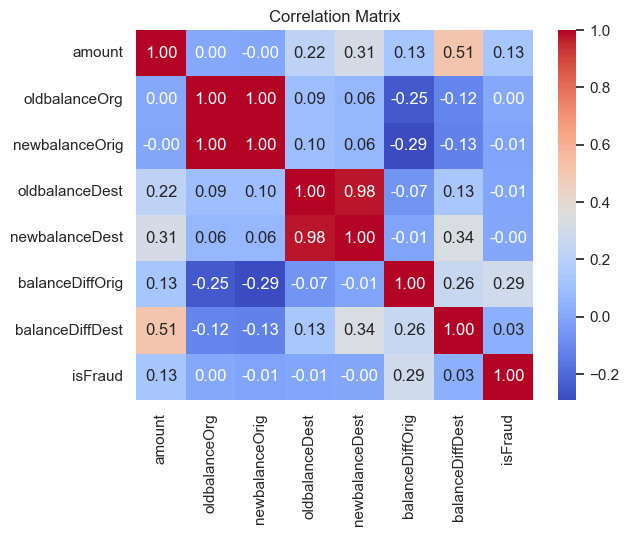

In [58]:
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')

In [60]:
zero_after_transfer = df[
    (df['type'].isin(['TRANSFER', 'CASH_OUT'])) &
    (df['newbalanceOrig'] == 0) &
    (df['oldbalanceOrg'] > 0) &
    (df['isFraud'] == 1)    
]

In [61]:
len(zero_after_transfer)

1113

In [62]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0,181.0,0.0
3,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0,181.0,-21182.0
251,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0,2806.0,0.0
252,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0,2806.0,-26202.0
680,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0,20128.0,0.0


In [63]:
df['isFraud'].value_counts()

isFraud
0    1047433
1       1142
Name: count, dtype: int64

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [6]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df_model = df.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)

In [8]:
df_model.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [9]:
Categorical = ['type']
numerical = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

In [10]:
y = df_model['isFraud']
X = df_model.drop('isFraud', axis=1)

In [11]:
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.3, stratify=y)

In [12]:
preproccessing = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical),
        ('cat', OneHotEncoder(drop='first'), Categorical)
    ],
    remainder='drop'
)

In [13]:
pipeline = Pipeline([
    ('preprocess', preproccessing),
    ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000))
])

In [14]:
pipeline.fit(X_Train, y_Train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [15]:
y_pred = pipeline.predict(X_Test)

In [16]:
print(classification_report(y_Test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97    314230
           1       0.02      0.97      0.03       343

    accuracy                           0.93    314573
   macro avg       0.51      0.95      0.50    314573
weighted avg       1.00      0.93      0.96    314573



In [17]:
confusion_matrix(y_Test, y_pred)

array([[293260,  20970],
       [     9,    334]], dtype=int64)

In [18]:
pipeline.score(X_Test, y_Test) * 100    

93.3309597454327

In [19]:
import joblib

joblib.dump(pipeline, 'fraud_detection_model.pkl')

['fraud_detection_model.pkl']